<a href="https://colab.research.google.com/github/eriksali/DNN_2023_NLP/blob/main/DNN_a4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



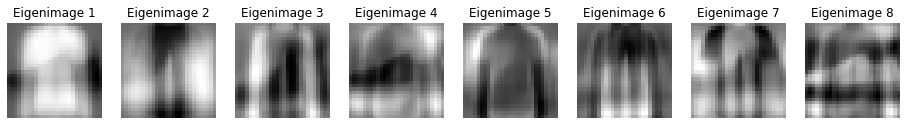

In [4]:
import torch
from torchvision import datasets, transforms
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)

data = trainset.data.numpy()
data = data.reshape(data.shape[0], -1)

data_mean = np.mean(data, axis=0)
data_std = np.std(data, axis=0)
data_norm = (data - data_mean) / data_std

pca = PCA(n_components=8)
pca.fit(data_norm)
eigenimages = pca.components_.reshape(8, 28, 28)

fig, axs = plt.subplots(1, 8, figsize=(16, 4))
for i in range(8):
    axs[i].imshow(eigenimages[i], cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(f'Eigenimage {i+1}')
plt.show()


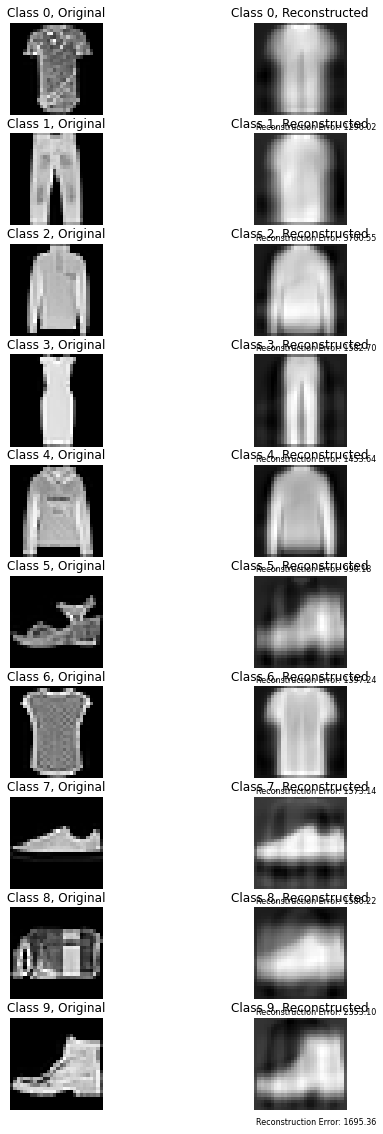

In [5]:
import torch
from torchvision import datasets, transforms
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)

data = trainset.data.numpy()
data = data.reshape(data.shape[0], -1)

data_mean = np.mean(data, axis=0)
data_std = np.std(data, axis=0)
data_norm = (data - data_mean) / data_std

pca = PCA(n_components=8)
pca.fit(data_norm)
eigenvectors = pca.components_.T

fig, axs = plt.subplots(10, 2, figsize=(8, 20))
for i in range(10):
    # select a random image from the i-th class
    class_data = data_norm[trainset.targets == i]
    random_idx = np.random.choice(class_data.shape[0])
    image = class_data[random_idx]

    # reconstruct the image using the top 8 eigenvectors
    coeffs = np.dot(eigenvectors.T, image)
    reconstructed_image = np.dot(eigenvectors, coeffs)

    # denormalize the original and reconstructed images
    original_image = (image * data_std) + data_mean
    reconstructed_image = (reconstructed_image * data_std) + data_mean

    # calculate the error between the original and reconstructed images
    error = np.mean((original_image - reconstructed_image) ** 2)

    # plot the original and reconstructed images side by side
    axs[i, 0].imshow(original_image.reshape(28, 28), cmap='gray')
    axs[i, 0].set_title(f'Class {i}, Original')
    axs[i, 0].axis('off')
    axs[i, 1].imshow(reconstructed_image.reshape(28, 28), cmap='gray')
    axs[i, 1].set_title(f'Class {i}, Reconstructed')
    axs[i, 1].axis('off')
    axs[i, 1].text(0, 32, f'Reconstruction Error: {error:.2f}', fontsize=8)
plt.show()





In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=60000,
                                          shuffle=True, num_workers=2)
dataiter = iter(trainloader)
images, labels = dataiter.next()
images = images.view(60000, -1)

mean = torch.mean(images, dim=0)
std = torch.std(images, dim=0)
images = (images - mean) / std

u, s, v = torch.svd(images)

fig, axs = plt.subplots(2, 4, figsize=(10, 5))
axs = axs.flatten()
for i in range(8):
    eig_img = v[i].reshape(28, 28)
    axs[i].imshow(eig_img, cmap='gray')
    axs[i].set_title('Eigenimage {}'.format(i+1))
plt.show()


AttributeError: ignored

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)


X = trainset.data.view(-1, 28*28).float()

X_mean = torch.mean(X, dim=0)
X_std = torch.std(X, dim=0)

X = (X - X_mean) / X_std

U, S, V = torch.svd(X)

eigenimages = U[:, :8].view(-1, 1, 28, 28)

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 8, figsize=(16, 2))

for i in range(8):
    axs[i].imshow(eigenimages[i].squeeze(), cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(f"Eigenimage {i+1}")

plt.show()


RuntimeError: ignored

In [1]:
import torch
import torchvision
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt

# Load Fashion-MNIST data
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                            download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=60000,
                                          shuffle=False, num_workers=2)

dataiter = iter(trainloader)
images, labels = dataiter.next()

# Reshape data into a 2D array
images = images.numpy().reshape(60000, -1)

# Center the data
mean = np.mean(images, axis=0)
images -= mean

# Compute covariance matrix and perform eigendecomposition
covariance = np.cov(images, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(covariance)

# Sort eigenvalues and eigenvectors in descending order
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Get the first 8 eigenvectors
eigenimages = eigenvectors[:, :8]

# Visualize the eigenimages
fig, axs = plt.subplots(2, 4, figsize=(10, 5))
for i in range(2):
    for j in range(4):
        idx = i * 4 + j
        eigenvector = eigenimages[:, idx]
        eigenvector = eigenvector.reshape(28, 28)
        axs[i, j].imshow(eigenvector, cmap='gray')
        axs[i, j].axis('off')
        axs[i, j].set_title(f'Eigenimage {idx + 1}')
plt.show()


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



AttributeError: ignored